In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Loading the Dataset

In [110]:
diabetesDF = pd.DataFrame(pd.read_csv('Weights/diabetes2.csv'))

In [111]:
print(diabetesDF.shape)
diabetesDF.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Preprocessing the Dataset

## Getting basic information about the dataset

In [112]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [113]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Dividing the dataset in Train, Validation and Test sets

In [114]:
trainData, validationData, testData = np.split(diabetesDF.sample(frac=1).reset_index(drop=True), [int(.7*len(diabetesDF)), int(.9*len(diabetesDF))])

In [115]:
trainData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,76,62,0,0,34.0,0.391,25,0
1,2,99,52,15,94,24.6,0.637,21,0
2,2,141,58,34,128,25.4,0.699,24,0
3,4,84,90,23,56,39.5,0.159,25,0
4,5,115,98,0,0,52.9,0.209,28,1


In [116]:
print(trainData.shape, validationData.shape, testData.shape)

(537, 9) (154, 9) (77, 9)


In [117]:
trainData = trainData.values.astype(np.float128)
validationData = validationData.values.astype(np.float128)
testData = testData.values.astype(np.float128)


In [118]:
X_train = trainData[:, :8]
y_train = trainData[:,8]
X_validation = validationData[:, :8]
y_validation = validationData[:,8]
X_test = testData[:, :8]
y_test = testData[:,8]


In [119]:
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(537, 8) (537,) (154, 8) (154,) (77, 8) (77,)


## Normalize the data(each feature should have mean 0 and standard deviation 1)

In [120]:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)

In [121]:
X_train = (X_train - X_mean)/X_std
X_validation = (X_validation - X_mean)/X_std
X_test = (X_test - X_mean)/X_std

In [122]:
# adding a column of 1's in the start of the training and test datas to denote X0
trainOnes = np.ones((trainData.shape[0], 1))
validationOnes = np.ones((validationData.shape[0], 1))
testOnes = np.ones((testData.shape[0], 1))
print(trainOnes.shape, validationOnes.shape, testOnes.shape)
X_train = np.hstack((trainOnes, X_train))
X_validation = np.hstack((validationOnes, X_validation))
X_test = np.hstack((testOnes, X_test))
print(X_train.shape, X_validation.shape ,X_test.shape)


(537, 1) (154, 1) (77, 1)
(537, 9) (154, 9) (77, 9)


In [123]:
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))

[ 1.00000000e+00  4.68407642e-20  1.61519877e-20  1.48598287e-19
 -6.46079507e-21 -3.23039753e-21  8.39903359e-20  3.87647704e-20
  6.13775532e-20]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]


# Logistic Regression

## Necessary Functions

In [124]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [125]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [126]:
def error(X, y, theta):
    hypo = hypothesis(X, theta)
    return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))

In [127]:
def gradient(X, y, theta):
    m = X.shape[0]
    hypo = hypothesis(X, theta)
    grad = -np.dot(X.T, (y - hypo)) 
    return grad/m   

## Logistic Regression with Batch Gradient Descent(BGD)

In [128]:
def batchGradientDescent(X_train, y_train, X_validation, y_validation, learningRate=0.01, maxEpochs=1000):
    m, n = X_train.shape
    theta = np.zeros((n,))
    trainErrorList = []
    validationErrorList = []
    for i in tqdm(range(maxEpochs)):
        trainErr = error(X_train, y_train, theta)
        trainErrorList.append(trainErr)
        validationErr = error(X_validation, y_validation, theta)
        validationErrorList.append(validationErr)
        grad = gradient(X_train, y_train, theta)
        theta = theta - learningRate * grad
    return theta, trainErrorList, validationErrorList


In [129]:
mainTheta, trainErrorList, validationErrorList = batchGradientDescent(X_train, y_train, X_validation, y_validation, 0.01, 1500)

100%|██████████| 1500/1500 [00:01<00:00, 1291.15it/s]


In [130]:
mainTheta

array([-0.69812781,  0.35383968,  1.02709892, -0.1645712 , -0.06538269,
       -0.02371715,  0.52175839,  0.41193241,  0.15687392], dtype=float128)

## Loss Plots

In [131]:
def drawBGDPlots(learningRate=0.01, maxEpochs=1000):
    theta, trainErrorList, validationErrorList = batchGradientDescent(
        X_train, y_train, X_validation, y_validation, learningRate, 1000)
    plt.plot(trainErrorList, label='Training Error', color='blue')
    plt.plot(validationErrorList, label='Validation Error', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


100%|██████████| 1000/1000 [00:00<00:00, 1118.44it/s]


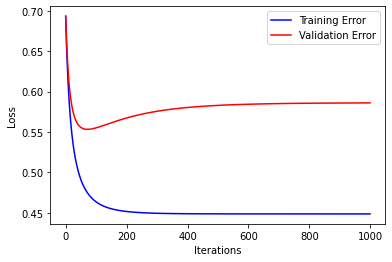

In [132]:
drawBGDPlots(0.1)

100%|██████████| 1000/1000 [00:00<00:00, 2135.01it/s]


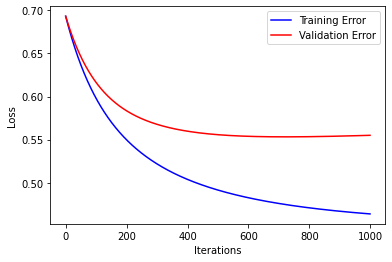

In [133]:
drawBGDPlots(0.01)


100%|██████████| 1000/1000 [00:00<00:00, 1053.80it/s]


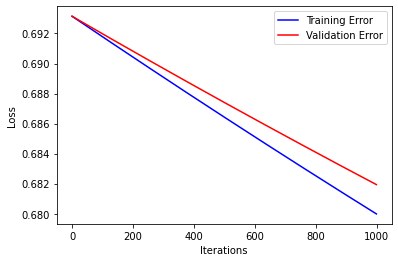

In [134]:
drawBGDPlots(0.0001)


100%|██████████| 1000/1000 [00:00<00:00, 1481.37it/s]


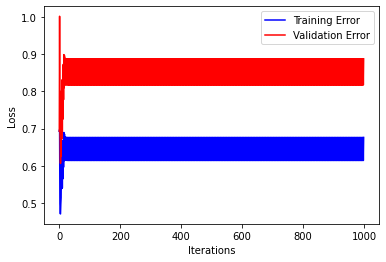

In [135]:
drawBGDPlots(10)

In [136]:
def getPredictionList(X, theta):
    hypo = hypothesis(X, theta)
    output = np.zeros((X.shape[0],))
    output[hypo >= 0.5] = 1
    output = output.astype('int')
    return output

In [137]:
def getConfusionMatrix(X, y, theta):
    y_ = getPredictionList(X, theta)
    confusionMatrix = np.zeros((2, 2))
    for i in tqdm(range(y.shape[0])):
        confusionMatrix[int(y[i]), int(y_[i])] += 1
    accuracy = (confusionMatrix[0, 0] + confusionMatrix[1, 1]) / np.sum(confusionMatrix)
    precision = (confusionMatrix[0, 0]) / confusionMatrix[:, 0].sum()
    recall = (confusionMatrix[0, 0]) / confusionMatrix[0, :].sum()
    f1 = 2 * precision * recall / (precision + recall)
    print(confusionMatrix)
    print('Accuracy: ' + str(accuracy))
    print('Precision: ' + str(precision))
    print('Recall: ' + str(recall))
    print('F1: ' + str(f1))

In [138]:
getConfusionMatrix(X_test, y_test, mainTheta)

100%|██████████| 77/77 [00:00<00:00, 73550.76it/s]

[[47.  5.]
 [ 9. 16.]]
Accuracy: 0.8181818181818182
Precision: 0.8392857142857143
Recall: 0.9038461538461539
F1: 0.8703703703703703


## Logistic Regression with Stochastic Gradient Descent(SGD)

In [139]:
def stochasticGradientDescent(X_train, y_train, X_validation, y_validation, learningRate=0.01, maxEpochs=1000):
    m, n = X_train.shape
    theta = np.zeros((n,))
    trainErrorList = []
    validationErrorList = []
    microError = []
    for i in tqdm(range(maxEpochs)):
        trainErr = error(X_train, y_train, theta)
        trainErrorList.append(trainErr)
        validationErr = error(X_validation, y_validation, theta)
        validationErrorList.append(validationErr)
        np.random.shuffle(X_train)
        for j in range(m):
            microErr = error(X_train[j, :], y_train[j], theta)
            microError.append(microErr)
            microGrad = gradient(X_train[j, :], y_train[j], theta)
            theta = theta - learningRate * microGrad
    return theta, trainErrorList, validationErrorList, microError


In [151]:
def miniBatchGradDescent(X, y, batchSize=1, learning_rate=0.01, max_iters=100):
    n = X.shape[1]
    theta = np.zeros((n,))
    errorList = []
    microErrorList = []

    #shuffling to maintain randomness
    data = np.hstack((X, y.reshape(-1, 1)))

    for i in tqdm(range(max_iters)):
        err = error(X, y, theta)
        errorList.append(err)
        # np.random.shuffle(data)
        m = data.shape[0]
        totalBatches = m//batchSize
        for j in range(totalBatches):
            batchData = data[j*batchSize:(j+1)*batchSize, :]
            X_batch = batchData[:, :-1]
            y_batch = batchData[:, -1]
            e = error(X_batch, y_batch, theta)
            microErrorList.append(e)
            batchGrad = gradient(X_batch, y_batch, theta)
            theta = theta - learning_rate*batchGrad
    return theta, errorList, microErrorList


In [141]:
mainTheta, trainErrorList, validationErrorList = stochasticGradientDescent(
    X_train, y_train, X_validation, y_validation, 10, 1500)

  7%|▋         | 112/1500 [00:08<01:28, 15.75it/s]/var/folders/fc/z3ktrz354nddfg1wt432tbm80000gn/T/ipykernel_14437/788270894.py:3: RuntimeWarning: divide by zero encountered in log
  return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))
 21%|██        | 316/1500 [00:18<00:52, 22.70it/s]/var/folders/fc/z3ktrz354nddfg1wt432tbm80000gn/T/ipykernel_14437/788270894.py:3: RuntimeWarning: invalid value encountered in multiply
  return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))
 27%|██▋       | 404/1500 [00:22<00:44, 24.80it/s]/var/folders/fc/z3ktrz354nddfg1wt432tbm80000gn/T/ipykernel_14437/788270894.py:3: RuntimeWarning: invalid value encountered in longdouble_scalars
  return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))
 51%|█████     | 762/1500 [00:45<00:44, 16.63it/s]


KeyboardInterrupt: 

In [ ]:
mainTheta

array([-0.79109207,  0.2971108 ,  1.12592152, -0.24349447, -0.03120358,
       -0.13166136,  0.72566068,  0.24758979,  0.28921356], dtype=float128)

In [168]:
def drawSGDPlots(learningRate=0.01, maxEpochs=1000):
    # theta, trainErrorList, validationErrorList, microError = stochasticGradientDescent(
    #     X_train, y_train, X_validation, y_validation, learningRate, maxEpochs)
    theta, trainErrorList, microError = miniBatchGradDescent(X_train, y_train, 1, learningRate, maxEpochs)
    # plt.plot(trainErrorList, label='Training Error', color='blue')
    # plt.plot(validationErrorList, label='Validation Error', color='red')
    # plt.xlabel('Iterations')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.show()
    plt.plot(np.arange(len(microError)), microError)
    # plt.plot(microError, label='Micro Error')

100%|██████████| 5/5 [00:00<00:00,  9.98it/s]


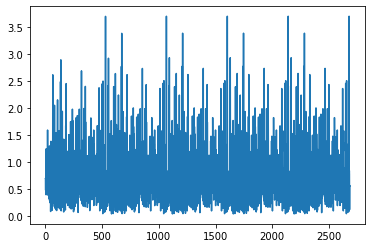

In [170]:
drawSGDPlots(0.1, 5)

100%|██████████| 500/500 [00:25<00:00, 19.55it/s]


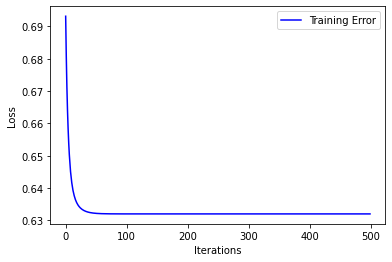

In [143]:
drawSGDPlots(0.001, 500)

 84%|████████▍ | 84/100 [00:07<00:00, 19.56it/s]/var/folders/fc/z3ktrz354nddfg1wt432tbm80000gn/T/ipykernel_14437/788270894.py:3: RuntimeWarning: divide by zero encountered in log
  return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))
/var/folders/fc/z3ktrz354nddfg1wt432tbm80000gn/T/ipykernel_14437/788270894.py:3: RuntimeWarning: invalid value encountered in multiply
  return -1*np.mean((y*np.log(hypo)) + ((1-y)*np.log(1-hypo)))
100%|██████████| 100/100 [00:07<00:00, 12.61it/s]


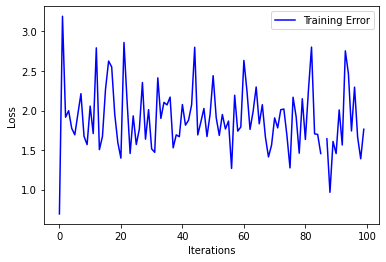

In [148]:
drawSGDPlots(1, 100)

100%|██████████| 1000/1000 [00:19<00:00, 51.43it/s]


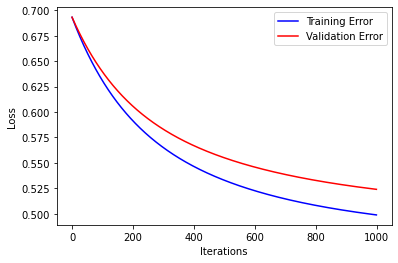

In [ ]:
drawSGDPlots(0.0001)

100%|██████████| 3000/3000 [00:52<00:00, 57.15it/s]


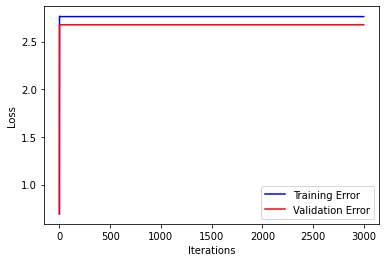

In [ ]:
drawSGDPlots(10, 3000)

In [ ]:
getConfusionMatrix(X_test, y_test, mainTheta)

100%|██████████| 77/77 [00:00<00:00, 60197.84it/s]

[[33. 14.]
 [16. 14.]]
Accuracy: 0.6103896103896104
Precision: 0.673469387755102
Recall: 0.7021276595744681
F1: 0.6875000000000001


# Sklearn's Implementation of Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

In [ ]:
sklearnModel = LogisticRegression()

LogisticRegression()

In [ ]:
trainSize, trainScores, testScores = learning_curve(LogisticRegression(), X_train, y_train)

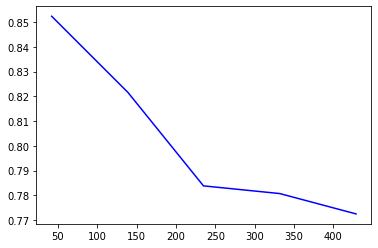

In [ ]:
plt.plot(trainSize, np.mean(trainScores, axis=1), label='Training Error', color='blue')
plt.show()

In [ ]:
model = LogisticRegression()

In [150]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

AttributeError: 'LogisticRegression' object has no attribute 'loss_curve_'